In [9]:
import rdflib 
import csv
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.feature_extraction.text import TfidfTransformer

In [10]:
g=rdflib.Graph()
subj=[]
pred=[]
obj=[]
g.parse('C:/Users/Abdellah-Bencheikh/Desktop/TP_RDF/amsterdammuseum_links.nt',format="nt")
print(len(g))

627


In [11]:
# imprime graphe a len(g) déclarations.
for s,p,o in g:
    subj.append(s)
    pred.append(p)
    obj.append(o)

In [12]:
df = pd.DataFrame({"subject" : subj, "predicat" : pred,"object" : obj})
df.to_csv("C:/Users/Abdellah-Bencheikh/Desktop/TP_RDF/sparql1.csv", sep=',',index=False)    

In [13]:
data=pd.read_csv("C:/Users/Abdellah-Bencheikh/Desktop/TP_RDF/sparql1.csv")
print("Schema:\n\n",data.dtypes)
print("Number of questions,columns=",data.shape)
data.head(5)

Schema:

 subject     object
predicat    object
object      object
dtype: object
Number of questions,columns= (627, 3)


,subject,predicat,object
0,http://dbpedia.org/resource/Louis_XV_of_France,http://www.w3.org/2002/07/owl#sameAs,http://purl.org/collections/nl/am/p-30027
1,http://dbpedia.org/resource/Tony_da_Costa_Pinho,http://www.w3.org/2002/07/owl#sameAs,http://purl.org/collections/nl/am/p-16954
2,http://dbpedia.org/resource/Jones_Leandro,http://www.w3.org/2002/07/owl#sameAs,http://purl.org/collections/nl/am/p-24893
3,http://dbpedia.org/resource/Ricardo_Jorge_Ferr...,http://www.w3.org/2002/07/owl#sameAs,http://purl.org/collections/nl/am/p-14071
4,"http://dbpedia.org/resource/Friedrich,_Prince_...",http://www.w3.org/2002/07/owl#sameAs,http://purl.org/collections/nl/am/p-34877


In [14]:
# nettoyage texte
def pre_process(text):
    # lowercase
    text=text.lower()
    #remove tags
    text=re.sub("<!--?.*?-->","",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

In [15]:
# nettoyons le texte après avoir concaténé les deux champs
data['text'] = data['subject']+['object']
data['text'] = data['text'].apply(lambda x:pre_process(x))

In [16]:
data['text']

0      http dbpedia org resource louis_xv_of_franceob...
1      http dbpedia org resource tony_da_costa_pinhoo...
2          http dbpedia org resource jones_leandroobject
3      http dbpedia org resource ricardo_jorge_ferrei...
4      http dbpedia org resource friedrich _prince_of...
5        http dbpedia org resource robert_benjaminobject
6      http dbpedia org resource fernando_tobias_de_c...
7       http dbpedia org resource wolfgang_abrahamobject
8         http dbpedia org resource odb_ wrestler object
9       http dbpedia org resource jan_bernd_bickerobject
10            http dbpedia org resource victorinusobject
11            http dbpedia org resource napoleon_iobject
12                http dbpedia org resource ciceroobject
13     http dbpedia org resource philip_ii_of_macedon...
14     http dbpedia org resource russell_smith_ polit...
15     http dbpedia org resource louis_xvi_of_franceo...
16     http dbpedia org resource nicholas_harold_phil...
17     http dbpedia org resourc

In [17]:
# obtenir la colonne de texte
docs=data['text'].tolist()
print(docs)

['http dbpedia org resource louis_xv_of_franceobject', 'http dbpedia org resource tony_da_costa_pinhoobject', 'http dbpedia org resource jones_leandroobject', 'http dbpedia org resource ricardo_jorge_ferreira_pinto_da_silvaobject', 'http dbpedia org resource friedrich _prince_of_waldeck_and_pyrmontobject', 'http dbpedia org resource robert_benjaminobject', 'http dbpedia org resource fernando_tobias_de_carvalhoobject', 'http dbpedia org resource wolfgang_abrahamobject', 'http dbpedia org resource odb_ wrestler object', 'http dbpedia org resource jan_bernd_bickerobject', 'http dbpedia org resource victorinusobject', 'http dbpedia org resource napoleon_iobject', 'http dbpedia org resource ciceroobject', 'http dbpedia org resource philip_ii_of_macedonobject', 'http dbpedia org resource russell_smith_ politician object', 'http dbpedia org resource louis_xvi_of_franceobject', 'http dbpedia org resource nicholas_harold_phillipsobject', 'http dbpedia org resource nicholas_harold_phillipsobject

In [18]:
""" créer le vocabulaire et lancer le processus de comptage """ 
# créer un vocabulaire de mots,
# ignorer les mots qui apparaissent dans 85% des documents,
# éliminer stop words
cv=CountVectorizer(max_df=0.80,stop_words='english')
# word_count_vector=cv.fit_transform(data['text'].values).toarray()
word_count_vector=cv.fit_transform(docs)

In [40]:
word_count_vector.shape
cv.get_feature_names()
# list(cv.vocabulary_.keys())[:10]

['_allenobject',
 '_archduke_of_austria',
 '_archduke_of_austriaobject',
 '_baron_de_montesquieuobject',
 '_cochran_',
 '_cohenobject',
 '_count_of_guingampobject',
 '_count_of_lippe',
 '_count_of_trapaniobject',
 '_countess_of_buteobject',
 '_crown_prince_of_saxonyobject',
 '_da_silvaobject',
 '_de_noronha_silvaobject',
 '_deutschobject',
 '_duchess_of_lorraineobject',
 '_duchess_of_montferratobject',
 '_duke_of_anjouobject',
 '_duke_of_breisgauobject',
 '_duke_of_gloucesterobject',
 '_duke_of_lorraineobject',
 '_duke_of_montbazonobject',
 '_duke_of_normandyobject',
 '_duke_of_parmaobject',
 '_duke_of_savoyobject',
 '_duke_of_saxe',
 '_duke_of_saxonyobject',
 '_duke_of_schleswig',
 '_duke_of_teckobject',
 '_duke_of_teschenobject',
 '_elector_of_bavariaobject',
 '_elector_of_hesseobject',
 '_elector_of_saxonyobject',
 '_german_emperorobject',
 '_grand_duke_of_hesseobject',
 '_grand_duke_of_tuscanyobject',
 '_hoffmanobject',
 '_holy_roman_emperorobject',
 '_jacobsobject',
 '_jr',
 '_k',

In [41]:
""" calculer les valeurs IDF """ 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tf=tfidf_transformer.fit(word_count_vector)

In [42]:
# Réduction de la dimension en utilisant SVD tronqué
svd = TruncatedSVD(n_components=2, random_state = 0)
X_2d = svd.fit_transform(word_count_vector)

In [43]:
# Standarisation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_2d)

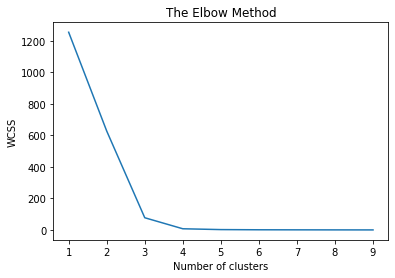

In [44]:
# trouver le nombre de classes optimales
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3, random_state = 0)
# predict our clusters for each song
clustered = kmeans.fit_predict(scaled_data)

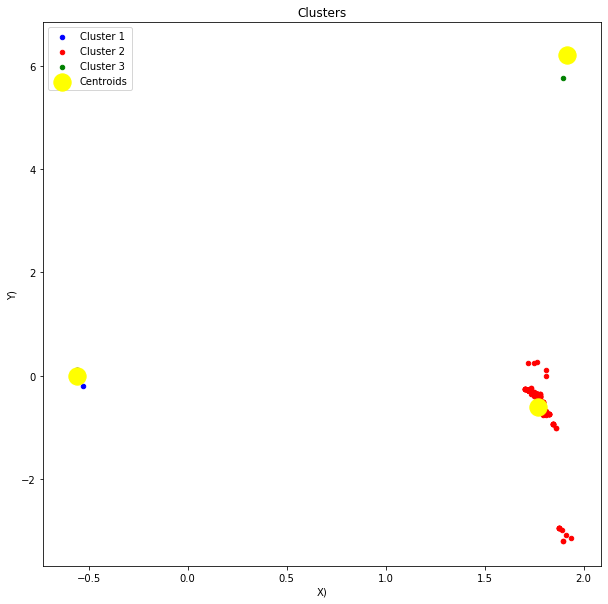

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(scaled_data[clustered == 0, 0], scaled_data[clustered == 0, 1], s = 20, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_data[clustered == 1, 0], scaled_data[clustered == 1, 1], s = 20, c = 'red', label = 'Cluster 2')
plt.scatter(scaled_data[clustered == 2, 0], scaled_data[clustered == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('X)')
plt.ylabel('Y)')
plt.legend()
plt.show()

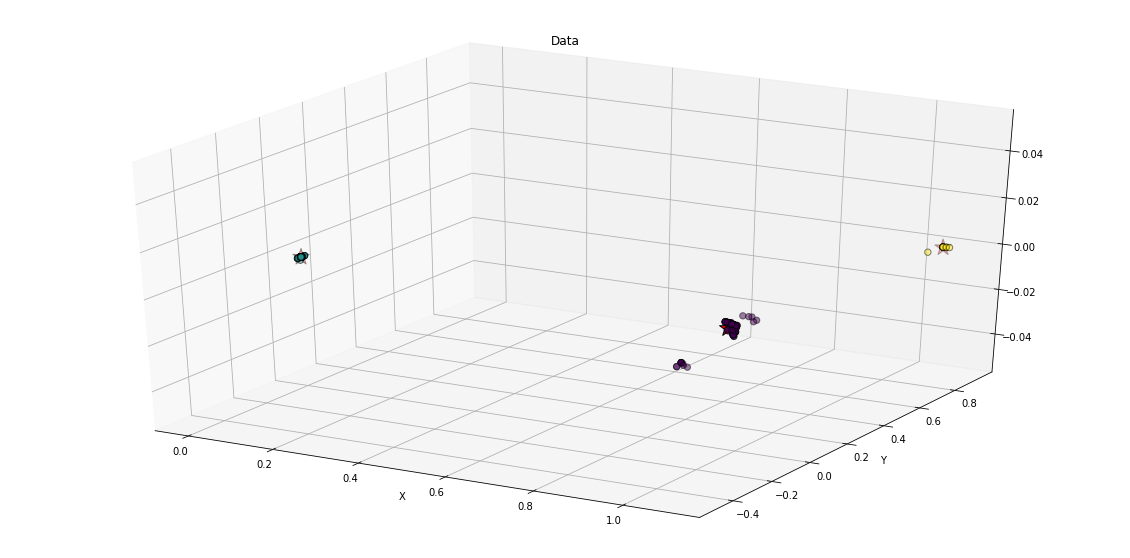

In [47]:
from mpl_toolkits.mplot3d import axes3d
kmeans_PCA = KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 3)
y_kmeans_PCA = kmeans_PCA.fit_predict(X_2d)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_2d[:,0],X_2d[:,1],c=y_kmeans_PCA, cmap='viridis',edgecolor='k', s=40, alpha = 0.5)
ax.set_title("Data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.dist = 10
ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1],s = 300, c = 'r', marker='*', label = 'Centroid' ,cmap='viridis', edgecolor='k')
plt.autoscale(enable=True, axis='x', tight=True)    
plt.show()